<a href="https://colab.research.google.com/github/AidanaBaimakishova/Test/blob/main/Yolov9Neural3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

### 0. Mount Google Drive ###

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

!scp '/content/gdrive/MyDrive/Neural1/train-20240430T175558Z-001.zip' '/content/data.zip'

!unzip '/content/data.zip' -d '/content/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/images/frame_111291.0_1_rot2.jpg  
  inflating: /content/train/images/frame_111279.0_1_trans.jpg  
  inflating: /content/train/images/frame_111291.0_1_trans.jpg  
  inflating: /content/train/images/frame_115398.0_0_rot2.jpg  
  inflating: /content/train/labels/frame_48777.03120165566_2.txt  
  inflating: /content/train/images/frame_111291.0_1_contr.jpg  
  inflating: /content/train/labels/frame_48781.030302352694_1.txt  
  inflating: /content/train/labels/frame_48773.03210095863_1.txt  
  inflating: /content/train/labels/frame_48781.030302352694_2.txt  
  inflating: /content/train/labels/frame_48785.029403049724_2.txt  
  inflating: /content/train/images/frame_115419.0_0_bright.jpg  
  inflating: /content/train/images/frame_111291.0_1.jpg  
  inflating: /content/train/labels/frame_48773.03210095863_2.txt  
  inflating: /content/train/images/frame_111279.0_1_rot2.jpg  
  inflating: /content/train/labels/frame

In [ ]:
import os
import random
from shutil import copyfile

# Путь к папке с изображениями и метками
images_dir = '/content/train/images'
labels_dir = '/content/train/labels'

# Папка, куда будут скопированы данные для обучения, валидации и тестирования
output_dir = '/content/output'

# Создаем папки для обучения, валидации и тестирования, если они еще не существуют
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Получаем список файлов изображений
image_files = os.listdir(images_dir)
# Перемешиваем список файлов
random.shuffle(image_files)

# Разделение на train, val и test
train_size = int(0.7 * len(image_files))
val_size = int(0.15 * len(image_files))
test_size = int(0.15 * len(image_files))

train_images = image_files[:train_size]
val_images = image_files[train_size:train_size + val_size]
test_images = image_files[train_size + val_size:]

# Копируем файлы изображений и меток в соответствующие папки
for folder, images in [(train_dir, train_images), (val_dir, val_images), (test_dir, test_images)]:
    os.makedirs(os.path.join(folder, 'images'), exist_ok=True)
    os.makedirs(os.path.join(folder, 'labels'), exist_ok=True)
    for image in images:
        image_path = os.path.join(images_dir, image)
        label_path = os.path.join(labels_dir, image.replace('.jpg', '.txt'))
        copyfile(image_path, os.path.join(folder, 'images', image))
        copyfile(label_path, os.path.join(folder, 'labels', image.replace('.jpg', '.txt')))



In [ ]:
import shutil
import os

def delete_non_empty_folder(folder_path):
    # Проверяем, существует ли папка
    if os.path.exists(folder_path):
        # Удаляем содержимое папки
        shutil.rmtree(folder_path)
        print(f"Папка {folder_path} успешно удалена")
    else:
        print(f"Папка {folder_path} не существует")

# Пример использования
folder_path = '/content/output'
#delete_non_empty_folder(folder_path)

In [ ]:
### 2. Clone repository ###

!git clone https://github.com/computervisioneng/yolov9

%cd yolov9

Cloning into 'yolov9'...
remote: Enumerating objects: 397, done.
remote: Counting objects: 100% (249/249), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 397 (delta 188), reused 183 (delta 183), pack-reused 148
Receiving objects: 100% (397/397), 2.54 MiB | 30.23 MiB/s, done.
Resolving deltas: 100% (203/203), done.
/content/yolov9


In [ ]:

### 3. Install requirements ###

!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux

In [ ]:

### 4. Train model ###

from yolov9 import Yolov9

model = Yolov9('object-detection')

model.train(data='/content/gdrive/MyDrive/Neural/data_1.yaml', epochs=20)

train_dual: weights=, cfg=models/detect/yolov9-c.yaml, data=/content/gdrive/MyDrive/Neural/data_1.yaml, hyp=hyp.scratch-high.yaml, epochs=20, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov9-c, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=15, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLO 🚀 34ba27f Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=7.5, cls=0.5, cls_pw=1.0, obj=0.7, obj_pw=1.0, dfl=1.5, iou_t=0.2, anchor_t=5.0, fl_

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.0/755.0 kB 6.7 MB/s eta 0:00:00


In [11]:
from ultralytics import YOLO

# Build a YOLOv9c model from scratch
model = YOLO('yolov9c.yaml')

# Build a YOLOv9c model from pretrained weight
model = YOLO('yolov9c.pt')

# Display model information (optional)
model.info()

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data='/content/gdrive/MyDrive/Neural1/data_1 (1).yaml', epochs=30, imgsz=320 )

YOLOv9c summary: 618 layers, 25590912 parameters, 0 gradients, 104.0 GFLOPs
Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=/content/gdrive/MyDrive/Neural1/data_1 (1).yaml, epochs=30, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames

100%|██████████| 755k/755k [00:00<00:00, 25.7MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    212864  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 1]        
  3                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  4                  -1  1    847616  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 1]       
  5                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  6                  -1  1   2857472  ultralytics.nn.modules.block.RepNCSPELAN4    [512, 512, 512, 256, 1]       
  7                  -1  1    656384  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 113MB/s]


AMP: checks passed ✅


train: Scanning /content/output/train/labels... 2433 images, 50 backgrounds, 0 corrupt: 100%|██████████| 2433/2433 [00:02<00:00, 1065.62it/s]


train: New cache created: /content/output/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/output/val/labels... 521 images, 14 backgrounds, 0 corrupt: 100%|██████████| 521/521 [00:00<00:00, 801.31it/s]

val: New cache created: /content/output/val/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.69G      1.267      1.334      1.344          2        320: 100%|██████████| 153/153 [00:51<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.22it/s]

                   all        521       1092      0.528      0.555        0.6      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.38G      1.236     0.9377      1.286          4        320: 100%|██████████| 153/153 [00:45<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.74it/s]

                   all        521       1092      0.446      0.627      0.587      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.35G      1.246     0.9131      1.288          4        320: 100%|██████████| 153/153 [00:43<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.62it/s]


                   all        521       1092      0.701      0.628      0.653      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      3.38G      1.213     0.8516      1.273          2        320: 100%|██████████| 153/153 [00:44<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.33it/s]

                   all        521       1092       0.83      0.629      0.652      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      3.37G      1.165      0.789      1.247          1        320: 100%|██████████| 153/153 [00:46<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.89it/s]

                   all        521       1092      0.707      0.662      0.662      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      3.37G      1.141     0.7519      1.223          5        320: 100%|██████████| 153/153 [00:44<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.98it/s]

                   all        521       1092      0.652      0.623      0.664      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      3.36G      1.096     0.7148      1.207          2        320: 100%|██████████| 153/153 [00:44<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.34it/s]

                   all        521       1092      0.833      0.703      0.736      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      3.38G       1.09     0.6915      1.198          1        320: 100%|██████████| 153/153 [00:43<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.96it/s]

                   all        521       1092       0.83      0.719      0.745      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      3.37G      1.067     0.6683      1.186          2        320: 100%|██████████| 153/153 [00:43<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.34it/s]

                   all        521       1092      0.825      0.723      0.752      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      3.37G      1.052      0.686       1.18          1        320: 100%|██████████| 153/153 [00:45<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.32it/s]

                   all        521       1092      0.851      0.757      0.781      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      3.36G      1.002     0.6138      1.157          5        320: 100%|██████████| 153/153 [00:44<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.60it/s]


                   all        521       1092      0.874       0.72      0.769      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      3.38G      1.005     0.6062      1.149          4        320: 100%|██████████| 153/153 [00:44<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.36it/s]

                   all        521       1092      0.831      0.775      0.786      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      3.37G     0.9715     0.5799      1.137          1        320: 100%|██████████| 153/153 [00:44<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.79it/s]

                   all        521       1092      0.815      0.727      0.761      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      3.37G     0.9522      0.564      1.125          3        320: 100%|██████████| 153/153 [00:44<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.39it/s]

                   all        521       1092      0.781      0.763      0.789       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      3.36G     0.9592     0.5623      1.128          4        320: 100%|██████████| 153/153 [00:43<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.39it/s]

                   all        521       1092      0.817      0.764      0.791      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      3.38G     0.9341     0.5436      1.109          2        320: 100%|██████████| 153/153 [00:43<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.53it/s]

                   all        521       1092      0.848      0.793      0.813       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      3.37G     0.9137     0.5148      1.093          3        320: 100%|██████████| 153/153 [00:43<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.38it/s]

                   all        521       1092      0.877      0.752      0.798      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      3.38G     0.9122     0.5082       1.09          3        320: 100%|██████████| 153/153 [00:44<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.88it/s]

                   all        521       1092      0.845      0.807      0.837      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      3.36G      0.873     0.4838      1.079          4        320: 100%|██████████| 153/153 [00:45<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.83it/s]

                   all        521       1092      0.839      0.801      0.831       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      3.38G     0.8525     0.4708      1.076          2        320: 100%|██████████| 153/153 [00:43<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.40it/s]

                   all        521       1092       0.86      0.797      0.829      0.571


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      3.37G     0.8596     0.4539        1.1          1        320: 100%|██████████| 153/153 [00:43<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.82it/s]

                   all        521       1092      0.871      0.796      0.832      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.37G     0.8412     0.4337       1.09          1        320: 100%|██████████| 153/153 [00:42<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.38it/s]

                   all        521       1092      0.891      0.799      0.835      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.36G     0.8175     0.4454      1.073          1        320: 100%|██████████| 153/153 [00:42<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.40it/s]

                   all        521       1092      0.876      0.813      0.843      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.38G     0.8091     0.4224      1.056          1        320: 100%|██████████| 153/153 [00:42<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  4.08it/s]

                   all        521       1092      0.843      0.833      0.845      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.37G     0.7821      0.395      1.051          4        320: 100%|██████████| 153/153 [00:41<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.39it/s]

                   all        521       1092      0.856       0.83       0.84      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.37G     0.7604      0.382      1.047          1        320: 100%|██████████| 153/153 [00:41<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.68it/s]

                   all        521       1092      0.879      0.815      0.847      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.36G     0.7403     0.3676      1.032          2        320: 100%|██████████| 153/153 [00:41<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.37it/s]

                   all        521       1092      0.907      0.829      0.859      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.38G     0.7221       0.35      1.026          1        320: 100%|██████████| 153/153 [00:41<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.70it/s]

                   all        521       1092      0.908      0.813      0.854       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.37G     0.7441     0.3538      1.055          1        320: 100%|██████████| 153/153 [00:43<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.36it/s]

                   all        521       1092      0.913       0.81      0.853       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.37G     0.7087     0.3497      1.013          1        320: 100%|██████████| 153/153 [00:42<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.38it/s]

                   all        521       1092      0.928      0.813      0.859      0.614



30 epochs completed in 0.421 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 51.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c summary (fused): 384 layers, 25324645 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.60it/s]


                   all        521       1092       0.93      0.812      0.859      0.613
                helmet        521        278      0.978      0.973       0.98      0.808
                 glove        521         21      0.898      0.286       0.38       0.19
                 boots        521        199      0.855      0.859       0.91      0.675
               glasses        521         79      0.881      0.797      0.899      0.429
    protective_clothes        521        347      0.985      0.978      0.991      0.902
                  siga        521        168      0.982       0.98      0.993      0.677
Speed: 0.1ms preprocess, 4.2ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
import cv2

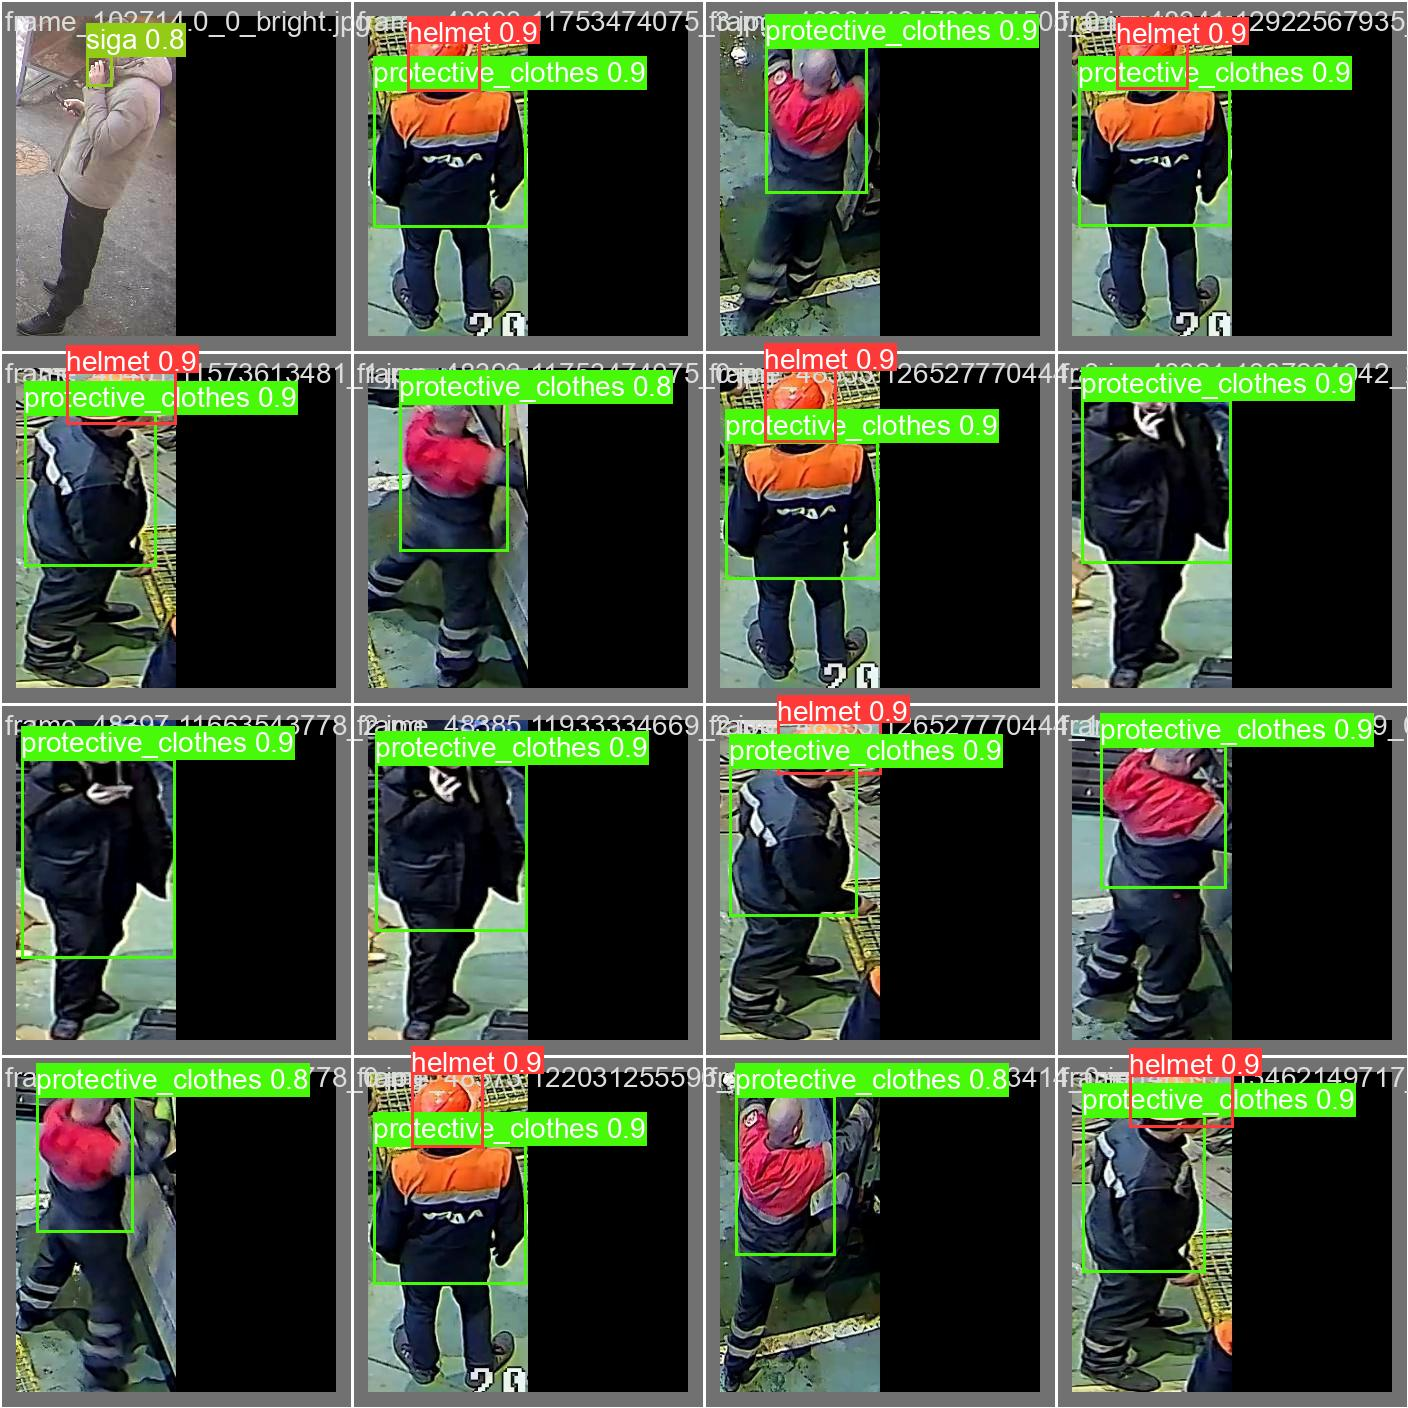

In [15]:
from IPython.display import Image

# Display the first image
Image(filename='/content/yolov9/runs/detect/train2/val_batch2_labels.jpg', width=320)

# Display the second image
Image(filename='/content/yolov9/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [16]:
from ultralytics import YOLO

# Build a YOLOv9c model from pretrained weight
model = YOLO('/content/gdrive/MyDrive/Neural1/best 1.pt')

# Display model information (optional)
model.info(verbose=True)

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data='/content/gdrive/MyDrive/Neural1/data_1 (1).yaml', epochs=20, imgsz=320, auto_augment="randaugment")


YOLOv9c summary: 618 layers, 25534629 parameters, 0 gradients, 103.7 GFLOPs
Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/gdrive/MyDrive/Neural1/best 1.pt, data=/content/gdrive/MyDrive/Neural1/data_1 (1).yaml, epochs=20, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embe

train: Scanning /content/output/train/labels.cache... 2433 images, 50 backgrounds, 0 corrupt: 100%|██████████| 2433/2433 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/output/val/labels.cache... 521 images, 14 backgrounds, 0 corrupt: 100%|██████████| 521/521 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.68G     0.7831     0.4457      1.041          2        320: 100%|██████████| 153/153 [00:49<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.37it/s]

                   all        521       1092      0.894      0.778      0.836      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.37G     0.8586     0.4928      1.066          4        320: 100%|██████████| 153/153 [00:45<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.60it/s]

                   all        521       1092      0.836      0.815       0.83      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.36G     0.9164     0.5425      1.094          4        320: 100%|██████████| 153/153 [00:44<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.37it/s]

                   all        521       1092      0.852       0.78      0.803      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.38G     0.9223     0.5515      1.102          2        320: 100%|██████████| 153/153 [00:45<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.43it/s]

                   all        521       1092      0.814      0.753      0.805       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.37G     0.9218     0.5501      1.107          1        320: 100%|██████████| 153/153 [00:43<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.83it/s]


                   all        521       1092      0.896      0.782      0.808      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.37G     0.9071     0.5298      1.092          5        320: 100%|██████████| 153/153 [00:43<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.35it/s]

                   all        521       1092      0.745      0.789      0.816      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.36G     0.8781     0.5074      1.087          2        320: 100%|██████████| 153/153 [00:43<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.55it/s]

                   all        521       1092      0.832      0.777      0.809       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.38G     0.8798      0.509      1.081          1        320: 100%|██████████| 153/153 [00:44<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.33it/s]

                   all        521       1092      0.844      0.807      0.817      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.38G     0.8606     0.4854      1.078          2        320: 100%|██████████| 153/153 [00:43<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.55it/s]

                   all        521       1092       0.92      0.807       0.84      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.37G     0.8569     0.4937       1.08          1        320: 100%|██████████| 153/153 [00:43<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.40it/s]

                   all        521       1092      0.814      0.831      0.829      0.572


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.36G     0.8154     0.4355       1.07          5        320: 100%|██████████| 153/153 [00:45<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.27it/s]

                   all        521       1092      0.906      0.812      0.831      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.38G     0.8098     0.4176      1.068          2        320: 100%|██████████| 153/153 [00:42<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.98it/s]

                   all        521       1092      0.898        0.8       0.83      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.37G     0.8017     0.4549      1.058          0        320: 100%|██████████| 153/153 [00:43<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.40it/s]

                   all        521       1092      0.915      0.817      0.849      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      3.38G     0.7787     0.3972      1.059          2        320: 100%|██████████| 153/153 [00:42<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.65it/s]

                   all        521       1092      0.895      0.829      0.855      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.36G     0.7413      0.379      1.038          2        320: 100%|██████████| 153/153 [00:42<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.36it/s]

                   all        521       1092      0.879      0.839      0.847      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.38G     0.7254     0.3659      1.023          1        320: 100%|██████████| 153/153 [00:42<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.65it/s]

                   all        521       1092      0.892      0.835      0.853      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.37G     0.7097     0.3697      1.005          1        320: 100%|██████████| 153/153 [00:42<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.41it/s]

                   all        521       1092      0.883      0.828       0.85      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.37G     0.6965     0.3451      1.014          1        320: 100%|██████████| 153/153 [00:43<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.60it/s]

                   all        521       1092       0.89       0.82      0.847      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.36G     0.6662     0.3325      0.995          2        320: 100%|██████████| 153/153 [00:42<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.33it/s]

                   all        521       1092      0.909      0.833      0.852      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.38G      0.656      0.322     0.9825          1        320: 100%|██████████| 153/153 [00:42<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.66it/s]

                   all        521       1092      0.915       0.83      0.856      0.625



20 epochs completed in 0.283 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 51.6MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c summary (fused): 384 layers, 25324645 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.94it/s]


                   all        521       1092      0.914       0.83      0.856      0.624
                helmet        521        278      0.978      0.974      0.981      0.826
                 glove        521         21      0.853      0.333      0.395      0.203
                 boots        521        199      0.865      0.894      0.921       0.69
               glasses        521         79       0.83      0.835      0.865      0.445
    protective_clothes        521        347      0.988       0.97      0.993      0.908
                  siga        521        168       0.97      0.973      0.984      0.674
Speed: 0.1ms preprocess, 4.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train3


In [ ]:

### 5. Copy results ###

!zip -r /content/runs.zip . -i /content/yolov9/runs

!scp '/content/runs.zip' '/content/gdrive/My Drive/Yolov9ObjectDetectionGoogleColab/runs.zip'

In [20]:
# from ultralytics import YOLO

# Load a model
model = YOLO('/content/gdrive/MyDrive/Neural1/best 1.pt')  # pretrained YOLOv8n model

# Run batched inference on a list of images
results = model('/content/output/test/images')  # return a list of Results objects



image 1/523 /content/output/test/images/frame_102714.0_0.jpg: 320x320 1 siga, 37.1ms
image 2/523 /content/output/test/images/frame_102837.0_0_trans.jpg: 320x320 1 siga, 24.0ms
image 3/523 /content/output/test/images/frame_102939.0_1_rot1.jpg: 320x320 1 siga, 21.7ms
image 4/523 /content/output/test/images/frame_102942.0_1_contr.jpg: 320x320 1 siga, 21.7ms
image 5/523 /content/output/test/images/frame_102948.0_1_bright.jpg: 320x320 1 siga, 21.7ms
image 6/523 /content/output/test/images/frame_102948.0_1_rot1.jpg: 320x320 1 siga, 21.7ms
image 7/523 /content/output/test/images/frame_103155.0_3_rot2.jpg: 320x320 2 sigas, 23.0ms
image 8/523 /content/output/test/images/frame_103206.0_1_bright.jpg: 320x320 1 siga, 21.7ms
image 9/523 /content/output/test/images/frame_103212.0_2_trans.jpg: 320x320 1 siga, 21.7ms
image 10/523 /content/output/test/images/frame_103215.0_2_bright.jpg: 320x320 1 siga, 18.9ms
image 11/523 /content/output/test/images/frame_103284.0_0_trans.jpg: 320x320 1 siga, 18.0ms
i

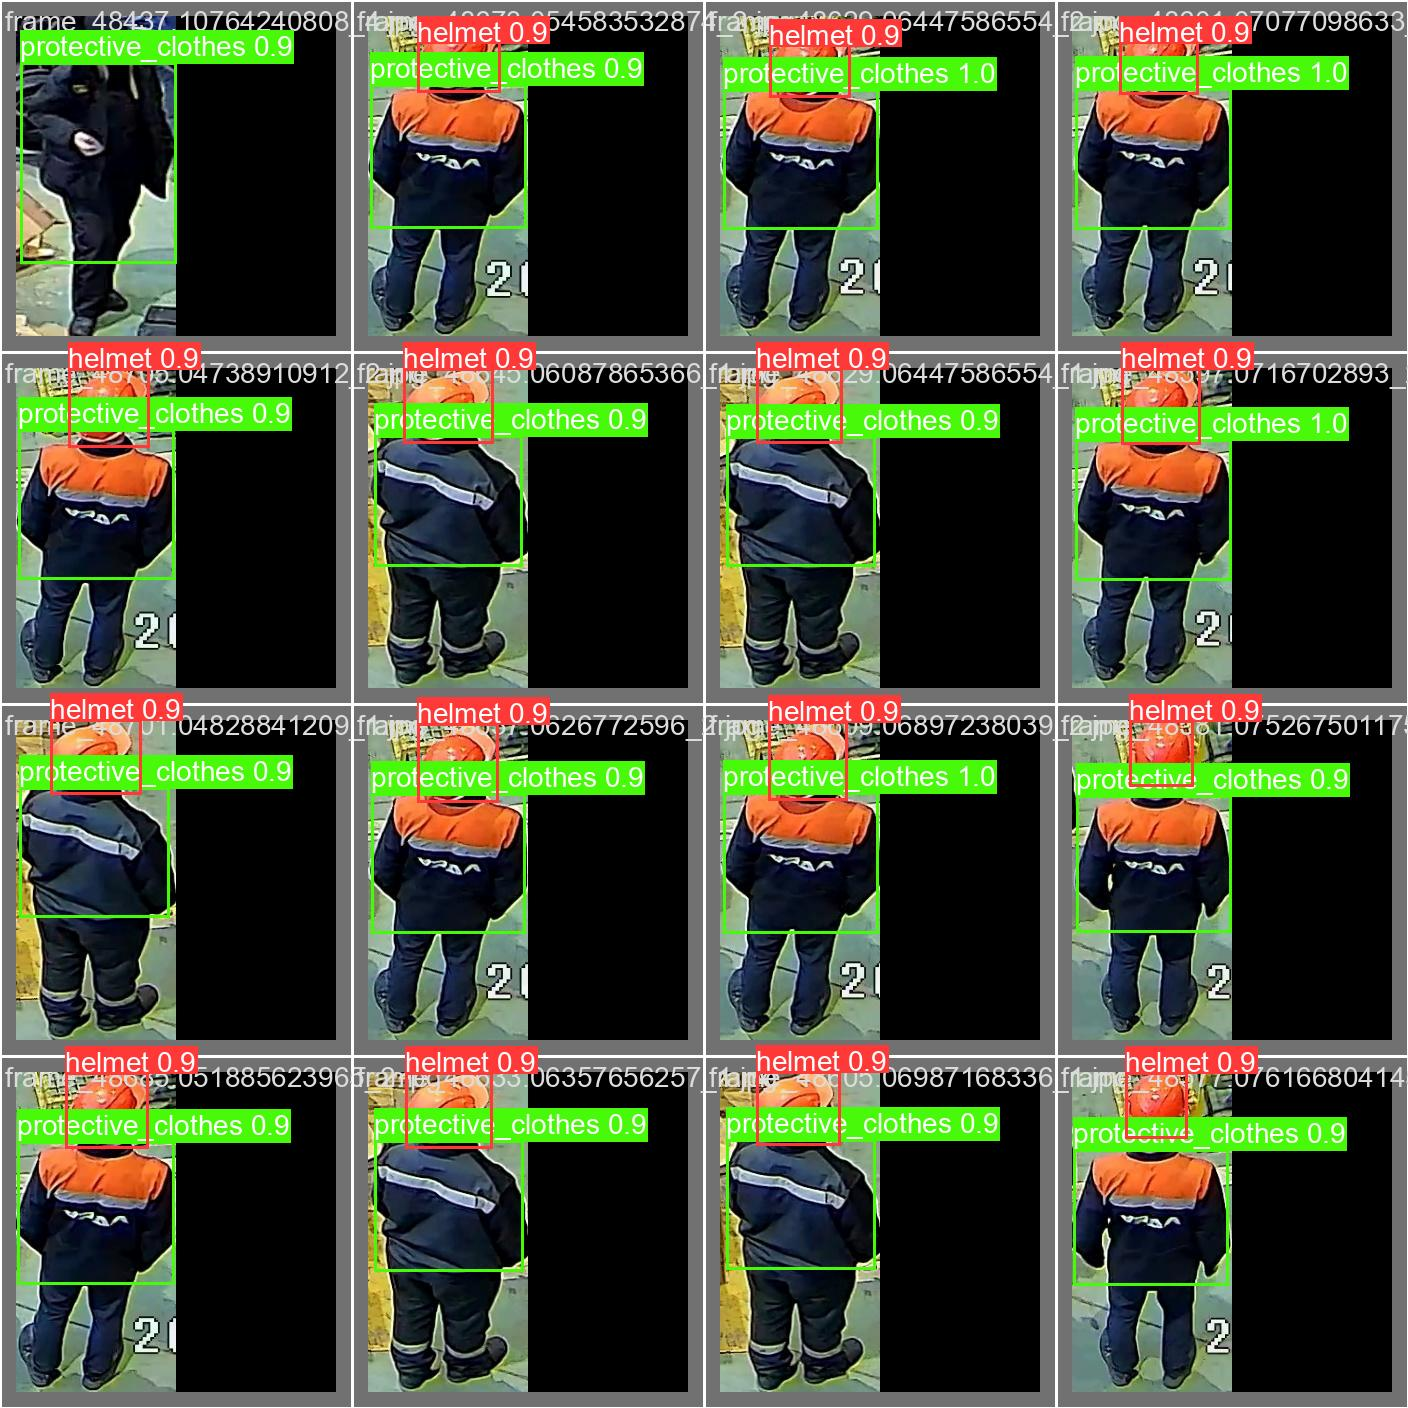

In [19]:
from IPython.display import Image

# Display the first image
Image(filename='/content/yolov9/runs/detect/train3/val_batch2_pred.jpg', width=320)

# Display the second image
Image(filename='/content/yolov9/runs/detect/train3/val_batch0_labels.jpg', width=600)
# Display the second image
Image(filename='/content/yolov9/runs/detect/train3/val_batch1_pred.jpg', width=600)